In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification --force
!unzip jigsaw-unintended-bias-in-toxicity-classification.zip


Saving kaggle.json to kaggle.json
100% 723M/723M [00:34<00:00, 23.7MB/s]
100% 723M/723M [00:34<00:00, 22.0MB/s]
Archive:  jigsaw-unintended-bias-in-toxicity-classification.zip
  inflating: all_data.csv            
  inflating: identity_individual_annotations.csv  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test_private_expanded.csv  
  inflating: test_public_expanded.csv  
  inflating: toxicity_individual_annotations.csv  
  inflating: train.csv               


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
# test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [ ]:
train_df = df #.sample(n=500000, random_state=42, ignore_index=True)
train_df.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26650,approved,0,0,0,1,0,0.000000,0,4


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import datetime
import os
import pandas as pd
import numpy as np
import pkg_resources
import seaborn as sns
import time
import scipy.stats as stats

from sklearn import metrics
from sklearn import model_selection

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.models import Model
from keras.models import load_model

Load and pre-process the data set¶


In [ ]:
train = train_df
print('loaded %d records' % len(train))

# Make sure all comment_text values are strings
train['comment_text'] = train['comment_text'].astype(str)

# List all identities
identity_columns = [
    'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness']

# Convert taget and identity columns to booleans
def convert_to_bool(df, col_name):
    df[col_name] = np.where(df[col_name] >= 0.5, True, False)

def convert_dataframe_to_bool(df):
    bool_df = df.copy()
    for col in ['target'] + identity_columns:
        convert_to_bool(bool_df, col)
    return bool_df

train = convert_dataframe_to_bool(train)

loaded 1804874 records


Split the data into 80% train and 20% validate sets¶


In [ ]:
train_df, validate_df = model_selection.train_test_split(train, test_size=0.2)
print('%d train comments, %d validate comments' % (len(train_df), len(validate_df)))


1443899 train comments, 360975 validate comments


In [ ]:
MAX_NUM_WORDS = 10000
TOXICITY_COLUMN = 'target'
TEXT_COLUMN = 'comment_text'

# Create a text tokenizer.
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(train_df[TEXT_COLUMN])

# All comments must be truncated or padded to be the same length.
MAX_SEQUENCE_LENGTH = 250
def pad_text(texts, tokenizer):
    return pad_sequences(tokenizer.texts_to_sequences(texts), maxlen=MAX_SEQUENCE_LENGTH)

Define and train a Convolutional Neural Net for classifying toxic comments

In [ ]:
!kaggle datasets download sawarn69/glove6b100dtxt

Dataset URL: https://www.kaggle.com/datasets/sawarn69/glove6b100dtxt
License(s): unknown
100% 131M/131M [00:08<00:00, 20.1MB/s]
100% 131M/131M [00:08<00:00, 17.1MB/s]


In [ ]:
!unzip glove6b100dtxt.zip

Archive:  glove6b100dtxt.zip
  inflating: glove.6B.100d.txt       


In [ ]:
from keras.layers import LSTM
import tensorflow as tf

EMBEDDINGS_PATH = 'glove.6B.100d.txt'
EMBEDDINGS_DIMENSION = 100
DROPOUT_RATE = 0.3
LEARNING_RATE = 0.00005
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Check if a GPU is available and set the device accordingly
if tf.test.gpu_device_name():
    print('GPU found')
    device = '/device:GPU:0'  # Use the first GPU
else:
    print('No GPU found')
    device = '/device:CPU:0'

def train_model(train_df, validate_df, tokenizer):
    # Prepare data
    train_text = pad_text(train_df[TEXT_COLUMN], tokenizer)
    train_labels = to_categorical(train_df[TOXICITY_COLUMN])
    validate_text = pad_text(validate_df[TEXT_COLUMN], tokenizer)
    validate_labels = to_categorical(validate_df[TOXICITY_COLUMN])

    # Load embeddings
    print('loading embeddings')
    embeddings_index = {}
    with open(EMBEDDINGS_PATH) as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(tokenizer.word_index) + 1,
                                 EMBEDDINGS_DIMENSION))
    num_words_in_embedding = 0
    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            num_words_in_embedding += 1
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    # Create model layers.
    def get_convolutional_neural_net_layers():
        """Returns (input_layer, output_layer)"""
        sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
        embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                                    EMBEDDINGS_DIMENSION,
                                    weights=[embedding_matrix],
                                    input_length=MAX_SEQUENCE_LENGTH,
                                    trainable=False)
        x = embedding_layer(sequence_input)
        x = Conv1D(128, 2, activation='relu', padding='same')(x)
        x = MaxPooling1D(5, padding='same')(x)
        x = Conv1D(128, 3, activation='relu', padding='same')(x)
        x = MaxPooling1D(5, padding='same')(x)
        x = Conv1D(128, 4, activation='relu', padding='same')(x)
        x = MaxPooling1D(40, padding='same')(x)
        x = LSTM(128)(x)
        x = Dropout(DROPOUT_RATE)(x)
        x = Dense(128, activation='relu')(x)
        preds = Dense(2, activation='softmax')(x)
        return sequence_input, preds

    # Compile model
    print('compiling model')
    input_layer, output_layer = get_convolutional_neural_net_layers()
    model = Model(input_layer, output_layer)
    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(lr=LEARNING_RATE),
                  metrics=['acc'])

    # Train model.
    print('training model')
    with tf.device(device):
        model.fit(train_text,
                  train_labels,
                  batch_size=BATCH_SIZE,
                  epochs=NUM_EPOCHS,
                  validation_data=(validate_text, validate_labels),
                  verbose=2)

    return model

model = train_model(train_df, validate_df, tokenizer)

GPU found
loading embeddings
compiling model


training model
Epoch 1/10
11281/11281 - 136s - loss: 0.1600 - acc: 0.9430 - val_loss: 0.1470 - val_acc: 0.9466 - 136s/epoch - 12ms/step
Epoch 2/10
11281/11281 - 117s - loss: 0.1463 - acc: 0.9469 - val_loss: 0.1441 - val_acc: 0.9470 - 117s/epoch - 10ms/step
Epoch 3/10
11281/11281 - 121s - loss: 0.1438 - acc: 0.9477 - val_loss: 0.1457 - val_acc: 0.9466 - 121s/epoch - 11ms/step
Epoch 4/10
11281/11281 - 116s - loss: 0.1436 - acc: 0.9482 - val_loss: 0.1451 - val_acc: 0.9473 - 116s/epoch - 10ms/step
Epoch 5/10
11281/11281 - 120s - loss: 0.1438 - acc: 0.9480 - val_loss: 0.1542 - val_acc: 0.9439 - 120s/epoch - 11ms/step
Epoch 6/10
11281/11281 - 107s - loss: 0.1440 - acc: 0.9480 - val_loss: 0.1485 - val_acc: 0.9448 - 107s/epoch - 9ms/step
Epoch 7/10
11281/11281 - 121s - loss: 0.1442 - acc: 0.9480 - val_loss: 0.1456 - val_acc: 0.9473 - 121s/epoch - 11ms/step
Epoch 8/10
11281/11281 - 116s - loss: 0.1445 - acc: 0.9479 - val_loss: 0.1487 - val_acc: 0.9446 - 116s/epoch - 10ms/step
Epoch 9/10
11281/1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/drive/MyDrive/cs267models
!cp glove-cnn-lstm.h5 /content/drive/MyDrive/cs267models

Generate model predictions on the validation set¶


In [ ]:
model.save('glove-cnn-lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
MODEL_NAME = 'CNN_LSTM_model'
validate_df[MODEL_NAME] = model.predict(pad_text(validate_df[TEXT_COLUMN], tokenizer))[:, 1]

11281/11281 [==============================] - 38s 3ms/step


In [ ]:
validate_df.head()


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,CNN_LSTM_model
284821,590946,False,"Soul, You're assuming that the reasons Trump w...",0.0,0.0,0.100000,0.300000,0.000000,NaN,NaN,...,approved,0,0,0,0,0,0.0,0,10,0.228110
832551,5139548,False,@ CEI\nAND Jimmy is smiling as he is no longer...,0.0,0.0,0.000000,0.166667,0.000000,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,6,0.171630
296490,605370,False,"Yes, come to the U of Oregon, if you are a stu...",0.0,0.0,0.166667,0.166667,0.166667,NaN,NaN,...,approved,0,0,0,0,0,0.0,0,6,0.027318
408935,743263,False,"Actually, the information for donations less t...",0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,...,approved,0,0,0,1,0,0.0,0,6,0.029324
270987,574264,False,Frank it is implied in the title of the articl...,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,0.027281


\*Define* bias metrics, then evaluate our new model for bias using the validation set predictions¶


In [ ]:
SUBGROUP_AUC = 'subgroup_auc'
BPSN_AUC = 'bpsn_auc'  # stands for background positive, subgroup negative
BNSP_AUC = 'bnsp_auc'  # stands for background negative, subgroup positive

def compute_auc(y_true, y_pred):
    try:
        return metrics.roc_auc_score(y_true, y_pred)
    except ValueError:
        return np.nan

def compute_subgroup_auc(df, subgroup, label, model_name):
    subgroup_examples = df[df[subgroup]]
    return compute_auc(subgroup_examples[label], subgroup_examples[model_name])

# def compute_bpsn_auc(df, subgroup, label, model_name):
#     """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
#     subgroup_negative_examples = df[df[subgroup] & ~df[label]]
#     non_subgroup_positive_examples = df[~df[subgroup] & df[label]]
#     examples = subgroup_negative_examples.append(non_subgroup_positive_examples)
#     return compute_auc(examples[label], examples[model_name])
def compute_bpsn_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
    subgroup_negative_examples = df[df[subgroup] & ~df[label]]
    non_subgroup_positive_examples = df[~df[subgroup] & df[label]]
    # Use concat instead of append
    examples = pd.concat([subgroup_negative_examples, non_subgroup_positive_examples])
    return compute_auc(examples[label], examples[model_name])

# def compute_bnsp_auc(df, subgroup, label, model_name):
#     """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
#     subgroup_positive_examples = df[df[subgroup] & df[label]]
#     non_subgroup_negative_examples = df[~df[subgroup] & ~df[label]]
#     examples = subgroup_positive_examples.append(non_subgroup_negative_examples)
#     return compute_auc(examples[label], examples[model_name])
def compute_bnsp_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
    subgroup_positive_examples = df[df[subgroup] & df[label]]
    non_subgroup_negative_examples = df[~df[subgroup] & ~df[label]]
    # Use concat instead of append
    examples = pd.concat([subgroup_positive_examples, non_subgroup_negative_examples])
    return compute_auc(examples[label], examples[model_name])

def compute_bias_metrics_for_model(dataset,
                                   subgroups,
                                   model,
                                   label_col,
                                   include_asegs=False):
    """Computes per-subgroup metrics for all subgroups and one model."""
    records = []
    for subgroup in subgroups:
        record = {
            'subgroup': subgroup,
            'subgroup_size': len(dataset[dataset[subgroup]])
        }
        record[SUBGROUP_AUC] = compute_subgroup_auc(dataset, subgroup, label_col, model)
        record[BPSN_AUC] = compute_bpsn_auc(dataset, subgroup, label_col, model)
        record[BNSP_AUC] = compute_bnsp_auc(dataset, subgroup, label_col, model)
        records.append(record)
    return pd.DataFrame(records).sort_values('subgroup_auc', ascending=True)

bias_metrics_df = compute_bias_metrics_for_model(validate_df, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
bias_metrics_df


,subgroup,subgroup_size,subgroup_auc,bpsn_auc,bnsp_auc
7,white,5129,0.794304,0.783131,0.952027
6,black,2979,0.805551,0.779622,0.956049
2,homosexual_gay_or_lesbian,2128,0.808339,0.766040,0.958857
5,muslim,4222,0.810887,0.808725,0.947265
4,jewish,1557,0.843908,0.874256,0.917187
0,male,8768,0.876501,0.875150,0.935280
1,female,10548,0.877669,0.886197,0.929127
3,christian,8040,0.888795,0.919223,0.902493
8,psychiatric_or_mental_illness,988,0.893758,0.851375,0.958433


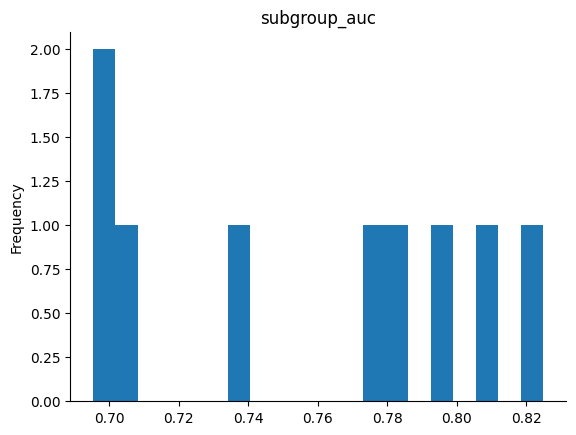

In [ ]:
# @title subgroup_auc

from matplotlib import pyplot as plt
bias_metrics_df['subgroup_auc'].plot(kind='hist', bins=20, title='subgroup_auc')
plt.gca().spines[['top', 'right',]].set_visible(False)

*Calculate* the final score¶


In [ ]:
def calculate_overall_auc(df, model_name):
    true_labels = df[TOXICITY_COLUMN]
    predicted_labels = df[model_name]
    return metrics.roc_auc_score(true_labels, predicted_labels)

def power_mean(series, p):
    total = sum(np.power(series, p))
    return np.power(total / len(series), 1 / p)

def get_final_metric(bias_df, overall_auc, POWER=-5, OVERALL_MODEL_WEIGHT=0.25):
    bias_score = np.average([
        power_mean(bias_df[SUBGROUP_AUC], POWER),
        power_mean(bias_df[BPSN_AUC], POWER),
        power_mean(bias_df[BNSP_AUC], POWER)
    ])
    return (OVERALL_MODEL_WEIGHT * overall_auc) + ((1 - OVERALL_MODEL_WEIGHT) * bias_score)

get_final_metric(bias_metrics_df, calculate_overall_auc(validate_df, MODEL_NAME))

0.883741091443744